# Working with structured data in Python using Pandas


## Table of Contents

1. [Introduction](#introduction)<br>
2. [Series and DataFrames](#series)<br>
3. [Cleaning Data](#cleaning)<br>
4. [Selecting Data](#selection)<br>
5. [Merging Data](#merging)<br>
6. [Grouping Data](#grouping)<br>
7. [Visualising Data](#visualise)<br>

<a id="introduction"></a>
## 1. Introduction

A lot of data is **structured data**, which is data that is organized and formatted so it is easily readable, for example a table with variables as columns and records as rows, or key-value pairs in a noSQL database. As long as the data is formatted consistently and has multiple records with numbers, text and dates, you can probably read the data with [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), an open-source Python package providing high-performance data manipulation and analysis.

### Data

The data that you will explore in this notebook is about the boroughs in London. Within Greater London there are [32 boroughs](https://en.wikipedia.org/wiki/London_boroughs). You can download the data from [data.gov.uk](https://data.gov.uk/dataset/248f5f04-23cf-4470-9216-0d0be9b877a8/london-borough-profiles-and-atlas) where this description is given:

> The London Borough Profiles help paint a general picture of an area by presenting a range of headline indicator data to help show statistics covering demographic, economic, social and environmental datasets for each borough, alongside relevant comparator areas.



In [2]:
import numpy as np
import pandas as pd

** Read data from a CSV file using the `read_csv` function. Load a file by running the next cell:**

This file is read directly from a URL: https://github.com/sumonacalpoly/Datasets/blob/main/london-borough-profiles.csv

Use the following line

In [4]:
df = pd.read_csv("/Users/ethanbernhardt/Data301/Data/DataSets/london-borough-profiles.csv", encoding='latin-1')

**Question-1: How many columns and Rows are there in the dataset?**

**Question-2: Display the first five and last five lines from the dataset.**






In [11]:
rows, cols = df.shape
rows, cols
print(df.head(5))
print(df.tail(5))

        Code             Area_name Inner/_Outer_London  \
0  E09000001        City of London        Inner London   
1  E09000002  Barking and Dagenham        Outer London   
2  E09000003                Barnet        Outer London   
3  E09000004                Bexley        Outer London   
4  E09000005                 Brent        Outer London   

   GLA_Population_Estimate_2017  GLA_Household_Estimate_2017  \
0                        8800.0                       5326.0   
1                      209000.0                      78188.0   
2                      389600.0                     151423.0   
3                      244300.0                      97736.0   
4                      332100.0                     121048.0   

   Inland_Area_(Hectares)  Population_density_(per_hectare)_2017  \
0                   290.0                                   30.3   
1                  3611.0                                   57.9   
2                  8675.0                                   44

We Only keep the data from the 32 boroughs by removng the last 5 rows from the DataFrame:

In [12]:
df = df.drop([33,34,35,36,37])
df.head(10)

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800.0,5326.0,290.0,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129.0,NaN,NaN,NaN,NaN,NaN
1,E09000002,Barking and Dagenham,Outer London,209000.0,78188.0,3611.0,57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228.0,Lab,0.0,100.0,0.0,36.5
2,E09000003,Barnet,Outer London,389600.0,151423.0,8675.0,44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134.0,Cons,50.8,NaN,1.6,40.5
3,E09000004,Bexley,Outer London,244300.0,97736.0,6058.0,40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164.0,Cons,71.4,23.8,0.0,39.6
4,E09000005,Brent,Outer London,332100.0,121048.0,4323.0,76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169.0,Lab,9.5,88.9,1.6,36.3
5,E09000006,Bromley,Outer London,327900.0,140602.0,15013.0,21.8,40.2,19.9,62.6,...,7.4,3.3,16.0,5.2,148.0,Cons,85.0,11.7,0.0,40.8
6,E09000007,Camden,Inner London,242500.0,107654.0,2179.0,111.3,36.4,17.3,71.0,...,7.1,3.6,21.3,3.9,164.0,Lab,22.2,74.1,1.9,38.7
7,E09000008,Croydon,Outer London,386500.0,159010.0,8650.0,44.7,37.0,22.0,64.9,...,7.2,3.3,24.5,6.5,178.0,Lab,42.9,57.1,0.0,38.6
8,E09000009,Ealing,Outer London,351600.0,132663.0,5554.0,63.3,36.2,21.4,66.8,...,7.3,3.6,23.8,6.9,164.0,Lab,17.4,76.8,5.8,41.2
9,E09000010,Enfield,Outer London,333000.0,130328.0,8083.0,41.2,36.3,22.8,64.4,...,7.3,2.6,25.2,7.0,152.0,Lab,34.9,65.1,0.0,38.2


<a id="cleaning"></a>
## 2. Cleaning Data

When exploring data there are always transformations needed to get it in the format you need for your analysis, visualisations or models. Below are only a few examples of the endless possibilities. The best way to learn is to find a dataset and try to answer questions with the data.

First, let's make a copy of the Dataframe loaded from the URL:

In [13]:
boroughs = df.copy()

### Adding an index

Indexing and selecting data is key to data analysis and creating visualizations. For more information on indexing have a look at the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html).

**Q3: Set the area code (`Code`) as the index, which will change the table slightly and display few rows of the dataset.**

In [ ]:
boroughs.set_index('Code')

As not all columns are needed, let's remove some. If you are interested in any of these, change the code and do not remove the columns.

In [ ]:
boroughs = boroughs.drop(columns=['GLA_Household_Estimate_2017',
       'Proportion_of_population_aged_0-15,_2015',
       'Proportion_of_population_of_working-age,_2015',
       'Proportion_of_population_aged_65_and_over,_2015',
       'Net_internal_migration_(2015)', 'Net_international_migration_(2015)',
       'Net_natural_change_(2015)',
       '%_of_largest_migrant_population_(2011)',
       'Second_largest_migrant_population_by_country_of_birth_(2011)',
       '%_of_second_largest_migrant_population_(2011)',
       'Third_largest_migrant_population_by_country_of_birth_(2011)',
       '%_of_third_largest_migrant_population_(2011)',
       '%_of_population_from_BAME_groups_(2016)',
       '%_people_aged_3+_whose_main_language_is_not_English_(2011_Census)',
       'Overseas_nationals_entering_the_UK_(NINo),_(2015/16)',
       'Largest_migrant_population_arrived_during_2015/16',
       'Second_largest_migrant_population_arrived_during_2015/16',
       'Third_largest_migrant_population_arrived_during_2015/16',
       'Male_employment_rate_(2015)',
       'Female_employment_rate_(2015)', 'Unemployment_rate_(2015)',
       'Youth_Unemployment_(claimant)_rate_18-24_(Dec-15)',
       'Proportion_of_16-18_year_olds_who_are_NEET_(%)_(2014)',
       'Proportion_of_the_working-age_population_who_claim_out-of-work_benefits_(%)_(May-2016)',
       '%_working-age_with_a_disability_(2015)',
       'Proportion_of_working_age_people_with_no_qualifications_(%)_2015',
       'Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015',
       'Gross_Annual_Pay,_(2016)',
       'Modelled_Household_median_income_estimates_2012/13',
       '%_adults_that_volunteered_in_past_12_months_(2010/11_to_2012/13)',
       'Number_of_jobs_by_workplace_(2014)',
       '%_of_employment_that_is_in_public_sector_(2014)', 'Jobs_Density,_2015',
       'Number_of_active_businesses,_2015',
       'Two-year_business_survival_rates_(started_in_2013)',
       'Crime_rates_per_thousand_population_2014/15',
       'Fires_per_thousand_population_(2014)',
       'Ambulance_incidents_per_hundred_population_(2014)',
       'Average_Band_D_Council_Tax_charge_(£),_2015/16',
       'New_Homes_(net)_2015/16_(provisional)',
       'Homes_Owned_outright,_(2014)_%',
       'Being_bought_with_mortgage_or_loan,_(2014)_%',
       'Rented_from_Local_Authority_or_Housing_Association,_(2014)_%',
       'Rented_from_Private_landlord,_(2014)_%',
       'Total_carbon_emissions_(2014)',
       'Household_Waste_Recycling_Rate,_2014/15',
       'Number_of_cars,_(2011_Census)',
       'Number_of_cars_per_household,_(2011_Census)',
       '%_of_adults_who_cycle_at_least_once_per_month,_2014/15',
       'Average_Public_Transport_Accessibility_score,_2014',
       'Achievement_of_5_or_more_A*-_C_grades_at_GCSE_or_equivalent_including_English_and_Maths,_2013/14',
       'Rates_of_Children_Looked_After_(2016)',
       '%_of_pupils_whose_first_language_is_not_English_(2015)',
       '%_children_living_in_out-of-work_households_(2015)',
       'Male_life_expectancy,_(2012-14)', 'Female_life_expectancy,_(2012-14)',
       'Teenage_conception_rate_(2014)',
       'Life_satisfaction_score_2011-14_(out_of_10)',
       'Worthwhileness_score_2011-14_(out_of_10)',
       'Anxiety_score_2011-14_(out_of_10)',
       'Childhood_Obesity_Prevalance_(%)_2015/16',
       'People_aged_17+_with_diabetes_(%)',
       'Mortality_rate_from_causes_considered_preventable_2012/14',
       'Proportion_of_seats_won_by_Conservatives_in_2014_election',
       'Proportion_of_seats_won_by_Labour_in_2014_election',
       'Proportion_of_seats_won_by_Lib_Dems_in_2014_election'])

In [ ]:
boroughs.columns

Index(['Area_name', 'Inner/_Outer_London', 'GLA_Population_Estimate_2017',
       'Inland_Area_(Hectares)', 'Population_density_(per_hectare)_2017',
       'Average_Age,_2017', '%_of_resident_population_born_abroad_(2015)',
       'Largest_migrant_population_by_country_of_birth_(2011)',
       'New_migrant_(NINo)_rates,_(2015/16)', 'Employment_rate_(%)_(2015)',
       'Gross_Annual_Pay_-_Male_(2016)', 'Gross_Annual_Pay_-_Female_(2016)',
       'Median_House_Price,_2015', '%_of_area_that_is_Greenspace,_2005',
       'Happiness_score_2011-14_(out_of_10)', 'Political_control_in_council',
       'Turnout_at_2014_local_elections'],
      dtype='object')

You can change names of columns using rename:

In [ ]:
boroughs.rename(columns={'Area_name':'Name',
                'Inner/_Outer_London':'Inner/Outer',
                'GLA_Population_Estimate_2017':'Population',
                'Inland_Area_(Hectares)':'Area (ha)',
                'Average_Age,_2017':'Average Age',
                'Political_control_in_council':'Political control',
                'Population_density_(per_hectare)_2017':'Population density (/ha)',
                'New_migrant_(NINo)_rates,_(2015/16)':'New migrant rates',
                'Happiness_score_2011-14_(out_of_10)':'Happiness score',
                '%_of_resident_population_born_abroad_(2015)':'Population born abroad (%)',
                'Employment_rate_(%)_(2015)':'Employment rate (%)',
                'Turnout_at_2014_local_elections':'Turnout at local elections',
                'Median_House_Price,_2015':'Median House Price',
                "Largest_migrant_population_by_country_of_birth_(2011)":'Largest migrant population',
                'Gross_Annual_Pay_-_Female_(2016)':'Gross Pay (Female)',
                'Gross_Annual_Pay_-_Male_(2016)':'Gross Pay (Male)',
                '%_of_area_that_is_Greenspace,_2005':'Greenspace (%)'},
                 inplace=True)

In [ ]:
boroughs.columns

Index(['Name', 'Inner/Outer', 'Population', 'Area (ha)',
       'Population density (/ha)', 'Average Age', 'Population born abroad (%)',
       'Largest migrant population', 'New migrant rates',
       'Employment rate (%)', 'Gross Pay (Male)', 'Gross Pay (Female)',
       'Median House Price', 'Greenspace (%)', 'Happiness score',
       'Political control', 'Turnout at local elections'],
      dtype='object')

In [ ]:
boroughs.head()

,Name,Inner/Outer,Population,Area (ha),Population density (/ha),Average Age,Population born abroad (%),Largest migrant population,New migrant rates,Employment rate (%),Gross Pay (Male),Gross Pay (Female),Median House Price,Greenspace (%),Happiness score,Political control,Turnout at local elections
Code,,,,,,,,,,,,,,,,,
E09000001,City of London,Inner London,8800.0,290.0,30.3,43.2,NaN,United States,152.2,64.6,NaN,NaN,799999.0,4.8,6.0,NaN,NaN
E09000002,Barking and Dagenham,Outer London,209000.0,3611.0,57.9,32.9,37.8,Nigeria,59.1,65.8,30104.0,24602.0,243500.0,33.6,7.1,Lab,36.5
E09000003,Barnet,Outer London,389600.0,8675.0,44.9,37.3,35.2,India,53.1,68.5,36475.0,31235.0,445000.0,41.3,7.4,Cons,40.5
E09000004,Bexley,Outer London,244300.0,6058.0,40.3,39.0,16.1,Nigeria,14.4,75.1,37881.0,28924.0,275000.0,31.7,7.2,Cons,39.6
E09000005,Brent,Outer London,332100.0,4323.0,76.8,35.6,53.9,India,100.9,69.5,30129.0,29600.0,407250.0,21.9,7.2,Lab,36.3


In [ ]:
boroughs.describe()

,Population,Area (ha),Population density (/ha),Average Age,Population born abroad (%),New migrant rates,Employment rate (%),Gross Pay (Male),Gross Pay (Female),Median House Price,Greenspace (%),Happiness score,Turnout at local elections
count,33.000000,33.000000,33.000000,33.000000,32.000000,33.000000,33.000000,23.000000,29.000000,3.300000e+01,33.000000,33.000000,32.000000
mean,267739.393939,4764.030303,74.475758,36.375758,36.512500,55.330303,72.715152,36554.565217,31006.344828,4.654680e+05,31.412121,7.209091,38.840625
std,75383.345058,3270.856878,39.390751,2.487849,10.495614,29.414659,4.219384,4263.657103,3578.444148,2.043563e+05,12.673120,0.249203,3.529220
min,8800.000000,290.000000,21.800000,31.400000,10.900000,14.400000,64.600000,30104.000000,24006.000000,2.435000e+05,4.800000,6.000000,29.800000
25%,231200.000000,2681.000000,44.900000,35.000000,32.350000,37.600000,69.200000,34189.000000,29204.000000,3.450000e+05,23.200000,7.200000,36.875000
50%,276200.000000,3762.000000,59.200000,36.200000,36.900000,53.500000,73.100000,36475.000000,30173.000000,4.100000e+05,31.700000,7.200000,38.500000
75%,321000.000000,5642.000000,108.900000,37.700000,41.850000,66.200000,75.400000,38372.500000,32657.000000,4.850000e+05,38.200000,7.300000,40.725000
max,389600.000000,15013.000000,155.600000,43.200000,54.100000,152.200000,79.600000,46627.000000,39132.000000,1.200000e+06,59.300000,7.600000,47.200000


In [ ]:
boroughs = boroughs.replace('.', float('NaN'))

**Note**: When reading data from CSV files or other sources, Pandas often infers the data type of columns. Sometimes, columns that should contain numbers might be assigned the 'object' data type (usually representing strings) if they contain any non-numeric values or formatting inconsistencies. This can hinder numerical analysis and operations. Therefore, `to_numeric` is used to explicitly convert such columns to the appropriate numeric type for further calculations.

In [ ]:
boroughs['Population density (/ha)'] = pd.to_numeric(boroughs['Population density (/ha)'])
boroughs['Population born abroad (%)'] = pd.to_numeric(boroughs['Population born abroad (%)'])
boroughs['Gross Pay (Male)'] = pd.to_numeric(boroughs['Gross Pay (Male)'])
boroughs['Gross Pay (Female)'] = pd.to_numeric(boroughs['Gross Pay (Female)'])
boroughs['Median House Price'] = pd.to_numeric(boroughs['Median House Price'])
boroughs['Greenspace (%)'] = pd.to_numeric(boroughs['Greenspace (%)'])
boroughs['Turnout at local elections'] = pd.to_numeric(boroughs['Turnout at local elections'])

#boroughs['Area (ha)'] = boroughs['Area (ha)'].str.replace(',', '')
#boroughs['Area (ha)'] = pd.to_numeric(boroughs['Area (ha)'])
boroughs['Area (ha)'] = boroughs['Area (ha)'].astype(str).str.replace(',', '')
boroughs['Area (ha)'] = pd.to_numeric(boroughs['Area (ha)'])


,0
Name,object
Inner/Outer,object
Population,float64
Area (ha),float64
Population density (/ha),float64
Average Age,float64
Population born abroad (%),float64
Largest migrant population,object
New migrant rates,float64
Employment rate (%),float64


**Question-4: Check the data types of the dataset**


**Q5: Using iloc, write the code to select all rows and the first two columns of the boroughs DataFrame. Explain in your own words what is the meaning of the code line that you wrote**

**Q6: Find the boroughs where the average age of the population is greater than 35.**

**Which borough has the largest population density per hectare in 2017?**

**Q7: What are the maximum and minimum number of new migrants in 2015/2016? And for which boroughs?**

* Print a value with `print()`  

**Q8: Which borough is happiest?**

* To extract an entire row use `idxmax()` which returns column with maximum value, and `.loc[]` to return row of the index




<a id="merging"></a>
##   Merging Data

Pandas has several different options to combine or merge data. The [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) has lots of examples.

Let's create two new Dataframes to explore this: `cities` and `cities2`

In [ ]:
data = {'city':       ['London','Manchester','Birmingham','Leeds','Glasgow'],
        'population': [9787426,  2553379,     2440986,    1777934,1209143],
        'area':       [1737.9,   630.3,       598.9,      487.8,  368.5 ]}
cities = pd.DataFrame(data)

data2 = {'city':       ['Liverpool','Southampton'],
        'population': [864122,  855569],
        'area':       [199.6,   192.0]}
cities2 = pd.DataFrame(data2)

In [ ]:
data = {'city': ['London','Manchester','Birmingham','Leeds','Glasgow'],
        'density': [5630,4051,4076,3645,3390]}
cities3 = pd.DataFrame(data)

In [ ]:
cities3

,city,density
0,London,5630
1,Manchester,4051
2,Birmingham,4076
3,Leeds,3645
4,Glasgow,3390


An extra column can be added with `.merge()` with an outer join using the city names:

In [ ]:
cities = pd.merge(cities, cities3, how='outer', sort=True,on='city')
cities

,city,population,area,density
0,Birmingham,2440986,598.9,4076
1,Glasgow,1209143,368.5,3390
2,Leeds,1777934,487.8,3645
3,London,9787426,1737.9,5630
4,Manchester,2553379,630.3,4051


**Question-9:**

Which city has the highest population density, and how does it compare to the average population density of all the cities in the dataset? Interpret your result.

use the formula to calculate the population density:
`population density =
population / area`


<a id="grouping"></a>
## Grouping Data - Explanation and Steps to help complete the tasks that follow

Grouping data is a quick way to calculate values for classes in your DataFrame.

In [ ]:
# Add a 'region' column to the 'cities' DataFrame
cities['region'] = ['London', 'North West', 'West Midlands', 'Yorkshire and the Humber', 'Scotland']


# Group by 'region' and calculate total population for each region
grouped_by_region = cities.groupby('region')['population'].sum()


In [ ]:
cities

,city,population,area,density,region
0,Birmingham,2440986,598.9,4076,London
1,Glasgow,1209143,368.5,3390,North West
2,Leeds,1777934,487.8,3645,West Midlands
3,London,9787426,1737.9,5630,Yorkshire and the Humber
4,Manchester,2553379,630.3,4051,Scotland


**Question-10:**
Determine which region has the highest total population. Additionally, rank the cities within each region by population in descending order. How does this ranking help in understanding population distribution across different regions?"






​


<a id="visualise"></a>
##  Visualising Data

Pandas uses [`Matplotlib`](https://matplotlib.org/users/index.html) as the default for visualisations.

Import the package and also add the magic line starting with `%` to output the charts within the notebook:

Use the following code as reference - it is suggested to first go over these examples and then answer the questions that follow

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
boroughs = boroughs.reset_index()

The default plot is a line chart that uses the index for the x-axis:

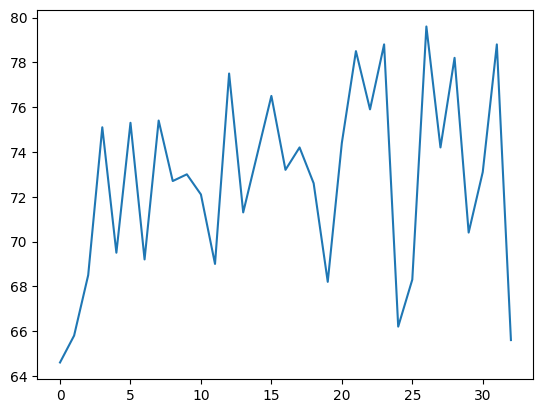

In [ ]:
boroughs['Employment rate (%)'].plot();

To create a plot that makes more sense for this data have a look at the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) for all options.

For the above example, a histogram might work better. You can change the number of `bins` to get the desired output:

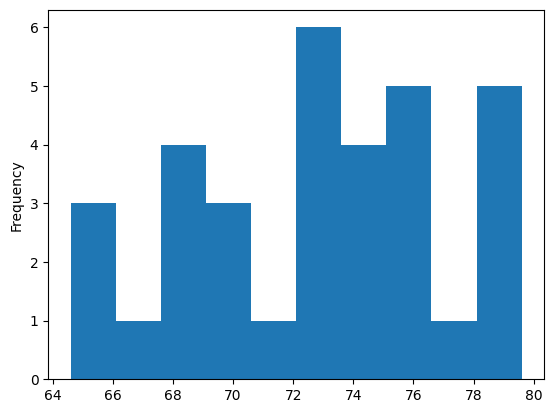

In [ ]:
boroughs['Employment rate (%)'].plot.hist(bins=10);

Change the size of the histogram with the `figsize` option:

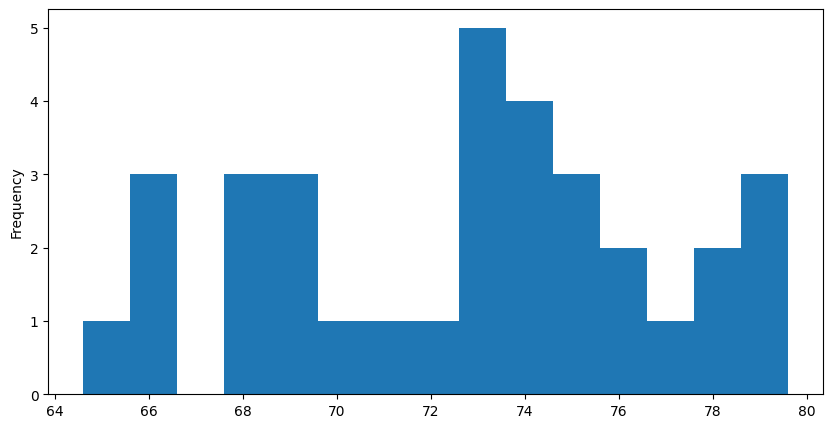

In [ ]:
boroughs['Employment rate (%)'].plot.hist(bins=15,figsize=(10,5));

Within the plot command you can select the data directly. The below histogram shows the Employment rate for Outer London only:

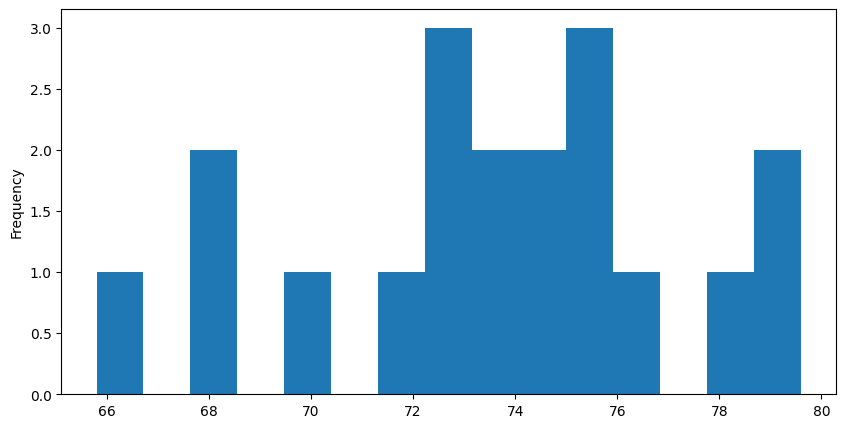

In [ ]:
boroughs['Employment rate (%)'][boroughs['Inner/Outer']=='Outer London'].plot.hist(bins=15,figsize=(10,5));

To add the Employment rate for Inner London, repeat the plot command with a different selection of the data:

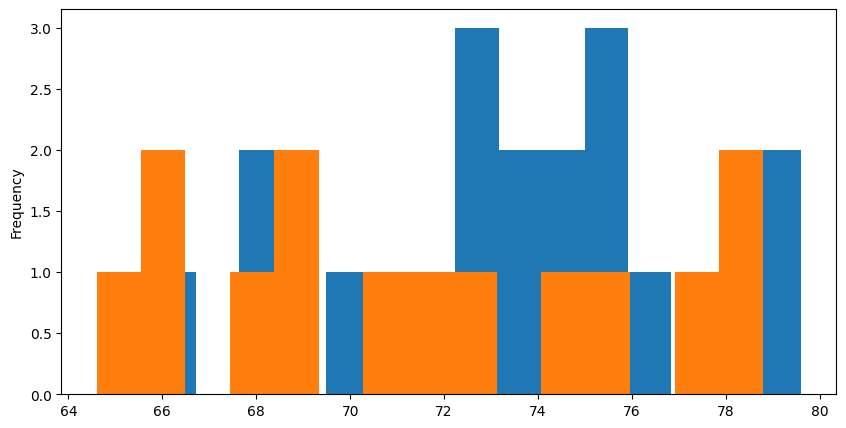

In [ ]:
boroughs['Employment rate (%)'][boroughs['Inner/Outer']=='Outer London'].plot.hist(bins=15,figsize=(10,5));
boroughs['Employment rate (%)'][boroughs['Inner/Outer']=='Inner London'].plot.hist(bins=15,figsize=(10,5));

The above plot is difficult to read as the histograms have overlapped. You can fix this by changing the colours and making them transparant.
    
To add a legend each histogram needs to be assigned to an object `ax`. With `legend()` you can then add a legend. With `plt.xlabel()` you can also add a label for the x-axis (this works similar for the y-axis):

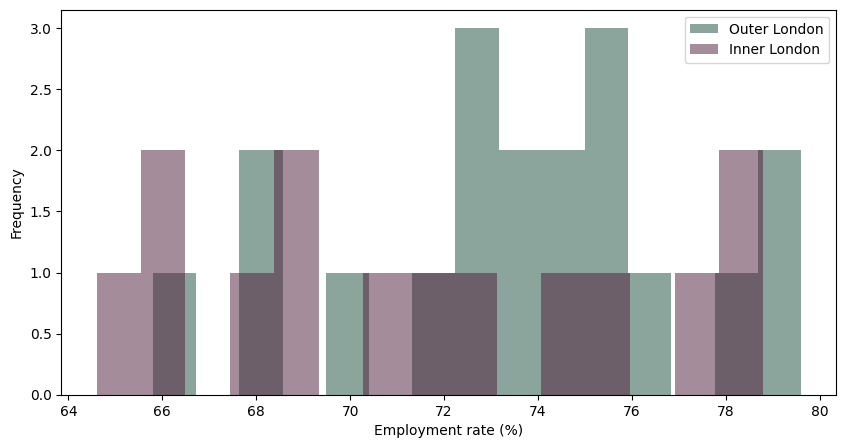

In [ ]:
ax = boroughs['Employment rate (%)'][boroughs['Inner/Outer']=='Outer London'].plot.hist(
    bins=15,figsize=(10,5),alpha=0.5,color='#1A4D3B');
ax = boroughs['Employment rate (%)'][boroughs['Inner/Outer']=='Inner London'].plot.hist(
    bins=15,figsize=(10,5),alpha=0.5,color='#4D1A39');
ax.legend(['Outer London','Inner London'])
plt.xlabel('Employment rate (%)');

There are various options available to change every aspect of your chart. Below are some examples to get you started.
        


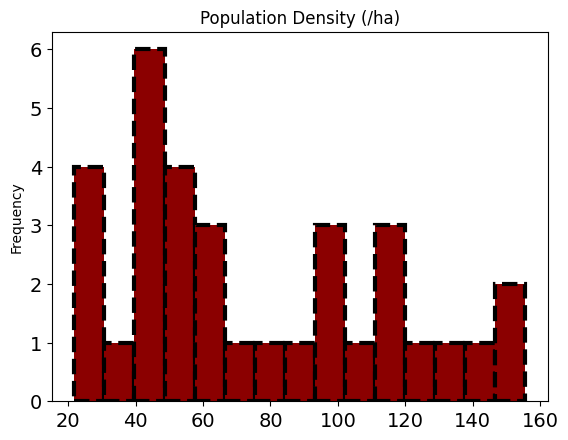

In [ ]:
boroughs['Population density (/ha)'].plot.hist(
    bins=15,
    title="Population Density (/ha)",
    legend=False,
    fontsize=14,
    grid=False,
    linestyle='--',
    edgecolor='black',
    color='darkred',
    linewidth=3);

## Seaborn

Seaborn is a Python data visualization library based on matplotlib. It is an easy to use visualisation package that works well with Pandas DataFrames.

Below are a few examples using Seaborn.

Refer to this [documentation](https://seaborn.pydata.org/index.html) for information on lots of plots you can create.

In [ ]:
import seaborn as sns

Let's look at a distribution plot using `distplot`, which shows a distribution of the data.

Use the `dropna()` function to remove rows and columns with Null/NaN values:

<ipython-input-43-82fb20aea883>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boroughs['Population density (/ha)'].dropna());


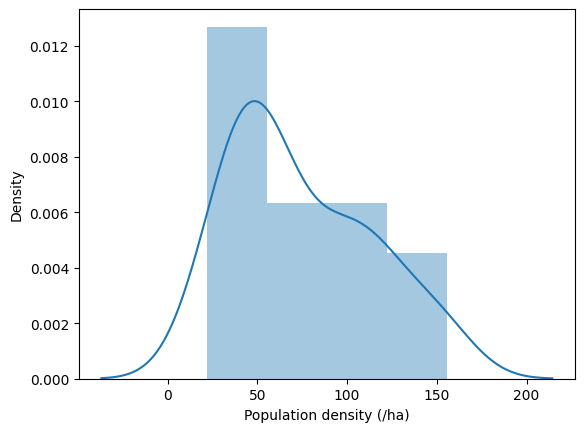

In [ ]:
sns.distplot(boroughs['Population density (/ha)'].dropna());

<You can create categorical plots with `catplot`. There are categorical scatter plots, distribution plots and estimate plots. The `kind` parameter selects the function to use, for instance box, violin, swarm ,bar, stripplot and boxen.
    
The default representation in catplot() uses a scatter plot:

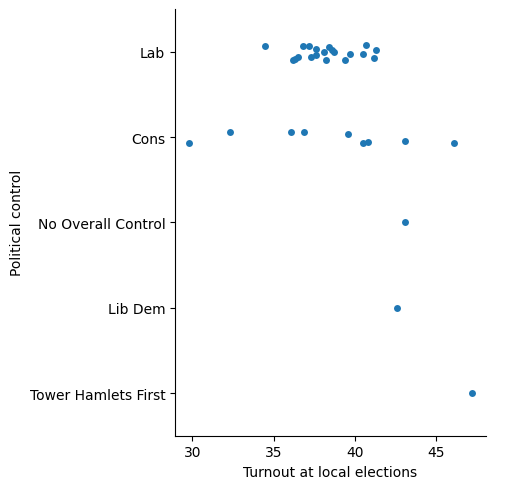

In [ ]:
sns.catplot(x='Turnout at local elections', y='Political control', data=boroughs);

Also try `kind="swarm"`, `kind="box"` or `kind="violin"`:

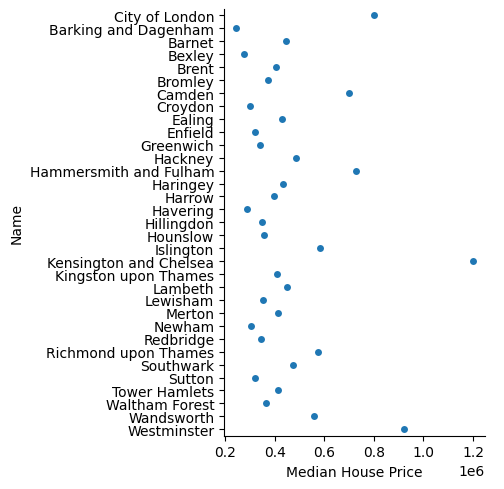

In [ ]:
sns.catplot(x='Median House Price', y='Name', kind='swarm', data=boroughs);

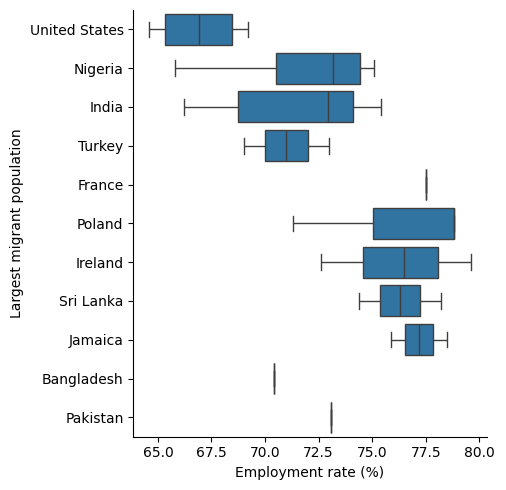

In [ ]:
sns.catplot(x='Employment rate (%)', y='Largest migrant population', kind="box", data=boroughs);

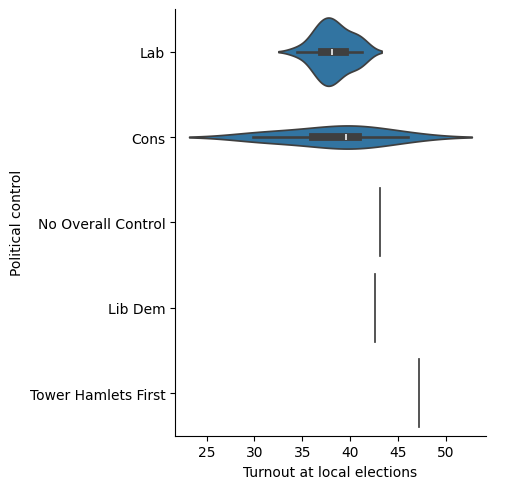

In [ ]:
sns.catplot(x='Turnout at local elections', y='Political control', kind="violin", data=boroughs);



**Q11: Create two histograms that compare the Gross Annual pay for Male and Female Employees using `.plot.hist()`**

* To add two histograms to one plot you can repeat `.plot()` in the same cell
* Add a legend by assiging each histogram to an object `ax`, which is used to create a legend

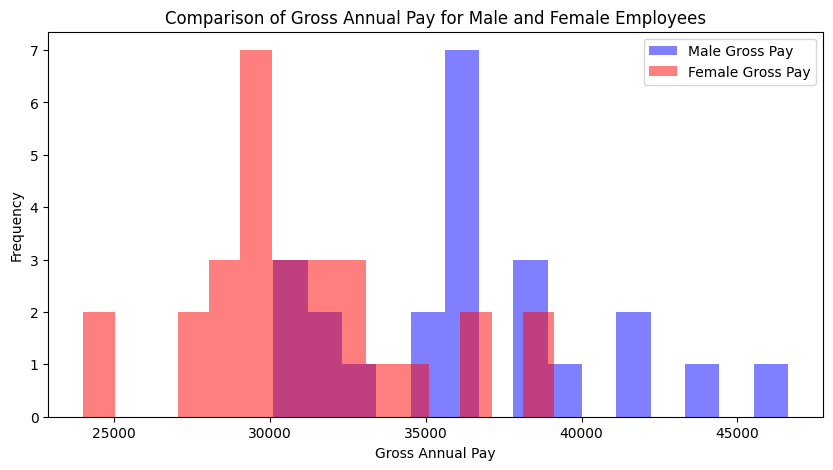

In [ ]:
import matplotlib.pyplot as plt

# Create the first histogram for Male Gross Pay
ax = boroughs['Gross Pay (Male)'].plot.hist(bins=15, figsize=(10, 5), alpha=0.5, color='blue')

# Create the second histogram for Female Gross Pay on the same plot
ax = boroughs['Gross Pay (Female)'].plot.hist(bins=15, figsize=(10, 5), alpha=0.5, color='red')

# Add a legend to differentiate the histograms
ax.legend(['Male Gross Pay', 'Female Gross Pay'])

# Add a title and labels for clarity
plt.title('Comparison of Gross Annual Pay for Male and Female Employees')
plt.xlabel('Gross Annual Pay')
plt.ylabel('Frequency')

# Display the plot
plt.show()

**Q12:Create a bar plot comparing the median house prices for different boroughs**

* To customise the size of your maps, use the example of `[fig, ax]`, which customises the figsize for each map in other examples above

**Q13: Considering the observed trends in the London Boroughs dataset, how do economic indicators like employment rate and median house price correlate with social factors like happiness and greenspace percentage in Inner London compared to Outer London?**



-- Is there a significant difference in the correlation between employment rate and happiness score between Inner and Outer London boroughs?

-- Does the percentage of greenspace have a stronger influence on median house prices in Inner London compared to Outer London?print Inner London Correlation and Outer London Correlation values. Explain your Interpretation.

-- Are boroughs with higher employment rates in Inner London also associated with higher happiness scores despite potentially lower greenspace availability?
